# MEEP simulations

We will look again at a waveguide, but in the time-domain. This will introduce concepts important when doing time-domain simulations.

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

Simple geometry as before :

In [2]:
resolution = 50 # pixels/μm
cell_size = mp.Vector3(14,14)

w = 0.5 # width of waveguide

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(mp.inf,w,mp.inf),
                     material=mp.Medium(epsilon=12))]

An important difference from MPB is that we would like to avoid periodic boundary conditions. To do so, we can introduce perfectly-matched layers around the simulation region :

!['PML'](images/PML.png)

In [3]:
pml_layers = [mp.PML(thickness=2)]

In the time-domain, we now need to define a way to excite the electromagnetic fields in the system. The most reliable way to do so is with en eigensource (see https://meep.readthedocs.io/en/latest/Python_Tutorials/Eigenmode_Source/).

In [5]:
fsrc = 0.15 # frequency of eigenmode or constant-amplitude source
kx = 0.4    # initial guess for wavevector in x-direction of eigenmode
bnum = 1    # band number of eigenmode

kpoint = mp.Vector3(kx)

sources = [mp.EigenModeSource(src=mp.GaussianSource(fsrc,fwidth=0.2*fsrc),
                              center=mp.Vector3(),
                              size=mp.Vector3(y=3*w),
                              direction=mp.NO_DIRECTION,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_parity=mp.EVEN_Y+mp.ODD_Z,
                              eig_match_freq=True)]

Defining the simulation object is similar to ModeSolver :

In [6]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    geometry=geometry,
                    symmetries=[mp.Mirror(mp.Y)])

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00493193 s
Working in 2D dimensions.
Computational cell is 14 x 14 x 0 with resolution 50
     block, center = (0,0,0)
          size (1e+20,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.380416 s
-----------
MPB solved for omega_1(0.4,0,0) = 0.165058 after 9 iters
MPB solved for omega_1(0.355637,0,0) = 0.149677 after 6 iters
MPB solved for omega_1(0.356547,0,0) = 0.15 after 5 iters
MPB solved for omega_1(0.356547,0,0) = 0.15 after 2 iters


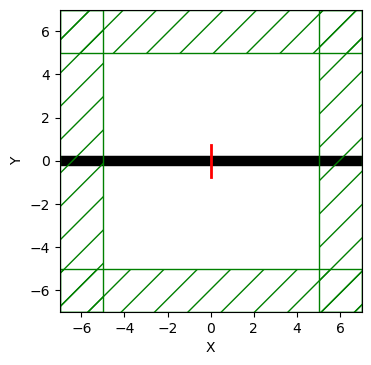

In [7]:
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

Meep progress: 23.7/100.0 = 23.7% done in 4.0s, 12.9s to go
on time step 2370 (time=23.7), 0.00168794 s/step
Meep progress: 47.06/100.0 = 47.1% done in 8.0s, 9.0s to go
on time step 4708 (time=47.08), 0.00171132 s/step
Meep progress: 70.27/100.0 = 70.3% done in 12.0s, 5.1s to go
on time step 7031 (time=70.31), 0.00172241 s/step
Meep progress: 93.60000000000001/100.0 = 93.6% done in 16.0s, 1.1s to go
on time step 9366 (time=93.66), 0.00171354 s/step
run 0 finished at t = 100.0 (10000 timesteps)


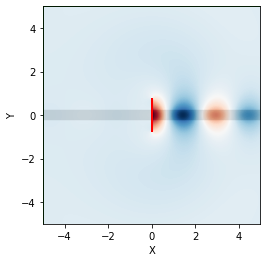

In [8]:
sim.run(until=100) # Run for some time
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10)),
           fields=mp.Ez,
           field_parameters={'alpha':0.9})
plt.show()

In [ ]:
f = plt.figure(dpi=100)
animate = mp.Animate2D(sim,mp.Ez,f=f,normalize=True)
sim.run(mp.at_every(1,animate),until_after_sources=50)
plt.close()

on time step 10000 (time=100), 0.0271263 s/step
Meep progress: 8.570000000000007/383.3333435058594 = 2.2% done in 4.0s, 175.0s to go
on time step 11454 (time=114.54), 0.0027522 s/step
Meep progress: 21.120000000000005/383.3333435058594 = 5.5% done in 8.0s, 137.3s to go
on time step 12608 (time=126.08), 0.00346756 s/step
Meep progress: 32.59/383.3333435058594 = 8.5% done in 12.0s, 129.2s to go
on time step 13712 (time=137.12), 0.00362363 s/step
Meep progress: 41.49000000000001/383.3333435058594 = 10.8% done in 16.0s, 131.9s to go
on time step 14560 (time=145.6), 0.00471735 s/step
Meep progress: 50.0/383.3333435058594 = 13.0% done in 20.1s, 133.7s to go
on time step 15413 (time=154.13), 0.00469381 s/step
Meep progress: 58.66/383.3333435058594 = 15.3% done in 24.1s, 133.1s to go
on time step 16238 (time=162.38), 0.00485107 s/step
Meep progress: 66.0/383.3333435058594 = 17.2% done in 28.1s, 134.9s to go
on time step 16933 (time=169.33), 0.00575809 s/step
Meep progress: 73.0/383.33334350585

In [9]:
filename = 'media/oblique-source-normal.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...
